In [1]:
%run ..\Functions.ipynb

# Test

## Test compression

In [4]:
folder=r'D:\ntr\GEOS5'
start_date = '2018-01-01'
end_date = '2018-01-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='MS' )

In [5]:
month_name=np.datetime_as_string(np.datetime64(date_range[0]),unit='M')
fhs=glob.glob(os.path.join(folder,month_name+'*.nc'))

In [16]:
month_name

'2018-01'

In [6]:
ds = xr.open_mfdataset(fhs,engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:     (time: 248, lat: 321, lon: 305)
Coordinates:
  * time        (time) datetime64[ns] 2018-01-01 ... 2018-01-31T21:00:00
  * lat         (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * lon         (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.38 64.69 65.0
Data variables: (12/29)
    ts          (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    qv10m       (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    t2mmax      (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    t10m        (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    tprecmax    (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    to3         (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    ...          ...
    qv2m        (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    tox         (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    troppt      (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    v50m        (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    tropt       (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
    tqv         (time, lat, lon) float32 dask.array<chunksize=(8, 321, 305), meta=np.ndarray>
Attributes:
    title:                GEOS5 FP 2d assimilated state
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Fri Nov 10 12:26:00 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [7]:
vars_list = ['t2m', #temperature
             't2mmax',
             't2mmin',
 'u2m', #windspeed
 'v2m',
 'qv2m', #specific humidity
 'slp', #sea level pressure
             'ps', #surface level pressure
            'tqv', # total_precipitable_water_vapor
            'to3', #total column ozone
             'tprecmax', #total precipitation
            ]
compression_opts={}
for var in vars_list:
    variable = ds[var]
    compression_attributes = {
        'zlib': variable.encoding.get('zlib'),
        'complevel': variable.encoding.get('complevel'),
        'shuffle': variable.encoding.get('shuffle'),
        '_FillValue': variable.encoding.get('_FillValue'),
        'scale_factor': variable.encoding.get('scale_factor'),
        'add_offset': variable.encoding.get('add_offset')
    }
    compression_opts[var]=compression_attributes
compression_opts

{'t2m': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 't2mmax': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 't2mmin': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 'u2m': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 'v2m': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 'qv2m': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
  'add_offset': None},
 'slp': {'zlib': False,
  'complevel': 0,
  'shuffle': False,
  '_FillValue': 1000000000000000.0,
  'scale_factor': None,
 

In [13]:
ds_daily=ds.resample(time='D').mean(skipna=True).compute()
ds_daily

<xarray.Dataset>
Dimensions:     (lat: 321, lon: 305, time: 31)
Coordinates:
  * lat         (lat) float64 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * lon         (lon) float64 -30.0 -29.69 -29.38 -29.06 ... 64.38 64.69 65.0
  * time        (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2018-01-31
Data variables: (12/29)
    ts          (time, lat, lon) float32 289.7 289.6 289.5 ... 270.8 270.9 270.8
    qv10m       (time, lat, lon) float32 0.01117 0.01121 ... 0.001572 0.001516
    t2mmax      (time, lat, lon) float32 289.9 289.9 289.9 ... 271.6 271.9 271.7
    t10m        (time, lat, lon) float32 290.0 290.0 290.0 ... 272.4 272.7 272.7
    tprecmax    (time, lat, lon) float32 1.76e-05 4.927e-05 ... 8.12e-12
    to3         (time, lat, lon) float32 271.6 271.7 271.7 ... 388.3 387.6 386.6
    ...          ...
    qv2m        (time, lat, lon) float32 0.01124 0.01127 ... 0.00167 0.001599
    tox         (time, lat, lon) float32 0.005829 0.00583 ... 0.008317 0.008294
    troppt      (time, lat, lon) float32 1.637e+04 1.637e+04 ... 2.773e+04
    v50m        (time, lat, lon) float32 -3.422 -4.47 -5.562 ... -1.97 -2.309
    tropt       (time, lat, lon) float32 208.5 208.6 208.6 ... 218.8 218.7 218.7
    tqv         (time, lat, lon) float32 34.56 35.26 35.73 ... 4.97 4.981 4.929
Attributes:
    title:                GEOS5 FP 2d assimilated state
    Conventions:          COARDS\nGrADS
    dataType:             Grid
    history:              Fri Nov 10 12:26:00 UTC 2023 : imported by GrADS Da...
    extra_das_attribute:  This is an example of metadata added using a supple...

In [15]:
filename=os.path.join(r'D:\ntr\GEOS5\Daily_average',r'2018-01.nc')

ds_daily.to_netcdf(filename)

## calculate daily average

In [ ]:
#Pseudo
# get list of month 2018 to 2022
start_date = '2018-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='MS' )
# loop to each month

month_folder=r'D:\ntr\GEOS5\Daily_average'
day_folder=r'D:\ntr\GEOS5'
for i,date in enumerate(date_range):
    month_name=np.datetime_as_string(np.datetime64(date),unit='M')                                
    if os.path.isfile(os.path.join(month_folder,month_name+'.nc')):   # check if the month already has daily average file in folder             
        continue # if yes, move to next item
    else:
        # Create a date range for the entire month
        start_date = date
        end_date = pd.to_datetime(start_date) + pd.offsets.MonthEnd(0)
        date_range = pd.date_range(start=start_date, end=end_date, freq='D')

        # Convert the dates to strings in the "YYYY-MM" format
        formatted_dates = [date.strftime('%Y-%m-%d') for date in date_range]
        if check_files_in_folder(day_folder, formatted_dates,required_size=9090432): # else, check if data for all the days in the month is available
            # if yes, calculate the daily average
            fhs=glob.glob(os.path.join(day_folder,month_name+'*.nc'))
            ds = xr.open_mfdataset(fhs,engine='netcdf4')
            ds_daily=ds.resample(time='D').mean(skipna=True).compute()
            output_file=os.path.join(month_folder,month_name+'.nc')
            ds_daily.to_netcdf(output_file)            
        else:
            continue # if not, move to the next item                           
                                     

## Calculate monthly average

In [8]:
#Pseudo
# get list of month 2018 to 2022
start_date = '2018-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='AS-JAN' )
# loop to each month

month_folder=r'D:\ntr\GEOS5\Daily_average'
year_folder=r'D:\ntr\GEOS5\Monthly_average'
for i,date in enumerate(date_range):
    year_name=np.datetime_as_string(np.datetime64(date),unit='Y')                                
    if os.path.isfile(os.path.join(year_folder,year_name+'.nc')):   # check if the month already has daily average file in folder             
        continue # if yes, move to next item
    else:
        # Create a date range for the entire month
        start_date = date
        end_date = pd.to_datetime(start_date) + pd.offsets.YearEnd(0)
        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

        # Convert the dates to strings in the "YYYY-MM" format
        formatted_dates = [date.strftime('%Y-%m') for date in date_range]
        if check_files_in_folder(month_folder, formatted_dates,required_size=9090432): # else, check if data for all the days in the month is available
            # if yes, calculate the daily average
            fhs=glob.glob(os.path.join(month_folder,year_name+'*.nc'))
            ds = xr.open_mfdataset(fhs,engine='netcdf4')
            ds_monthly=ds.resample(time='MS').mean(skipna=True).compute()
            output_file=os.path.join(year_folder,year_name+'.nc')
            ds_monthly.to_netcdf(output_file)            
        else:
            continue # if not, move to the next item
                            
                                     

## Calculate yearly average

In [ ]:
#Pseudo
# get list of month 2018 to 2022
start_date = '2018-01-01'
end_date = '2022-12-31'

date_range = pd.date_range(start=start_date, end=end_date, freq='AS-JAN' )
# loop to each month
year_folder=r'E:\WaPORQA\GEOS5\Monthy_average'
fhs=glob.glob(os.path.join(year_folder,'*.nc'))
ds = xr.open_mfdataset(fhs,engine='netcdf4')

for i,date in enumerate(date_range):
    year_name=np.datetime_as_string(np.datetime64(date),unit='Y')                                

        # Create a date range for the entire month
        start_date = date
        end_date = pd.to_datetime(start_date) + pd.offsets.YearEnd(0)
        date_range = pd.date_range(start=start_date, end=end_date, freq='MS')

        # Convert the dates to strings in the "YYYY-MM" format
        formatted_dates = [date.strftime('%Y-%m') for date in date_range]
        if check_files_in_folder(month_folder, formatted_dates,required_size=9090432): # else, check if data for all the days in the month is available
            # if yes, calculate the daily average
            fhs=glob.glob(os.path.join(month_folder,year_name+'*.nc'))
            ds = xr.open_mfdataset(fhs,engine='netcdf4')
            ds_monthly=ds.resample(time='MS').mean(skipna=True).compute()
            output_file=os.path.join(year_folder,year_name+'.nc')
            ds_monthly.to_netcdf(output_file)            
        else:
            continue # if not, move to the next item
                            
                                     

# Aggregate all files

## Daily average

In [3]:
start_date = '2018-01-01'
end_date = '2022-12-31'
input_folder = r"E:\WaPORQA\ERA5\Processed"
output_folder = r"E:\WaPORQA\ERA5\Processed\Daily"
periods_dates = get_periods_dates(start_date, end_date,freq='M')
for period_dates in periods_dates:
    period_name = period_dates[0].strftime('%Y-%m')
    files=get_filenames_as_dates(period_dates[0], period_dates[1],
                          freq='D', 
                          date_format='%Y-%m-%d',
                          prefix='',
                          suffix='_t-p-u-vp-ra.nc'
                         )
    # else, check if data for all the days in the month is available
    if check_files_in_folder(input_folder, files,required_size=55000):
        fhs = [os.path.join(input_folder,file) for file in files]
        output_file = os.path.join(output_folder,period_name+'.nc')
        print(output_file)
        ds_agg = aggregate_by_time(fhs,output_file,
                      resample_size = 'D',
                     attrs = {'input': input_folder
                     }
                                    )

E:\WaPORQA\ERA5\Processed\Daily\2018-01.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-02.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-03.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-04.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-05.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-06.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-07.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-08.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-09.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-10.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-11.nc
E:\WaPORQA\ERA5\Processed\Daily\2018-12.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-01.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-02.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-03.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-04.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-05.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-06.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-07.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-08.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-09.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-10.nc
E:\WaPORQA\ERA5\Processed\Daily\2019-11.nc
E:\WaPORQA\

## Monthly average

In [4]:
start_date = '2018-01-01'
end_date = '2022-12-31'
input_folder =  r"E:\WaPORQA\ERA5\Processed\Daily"
output_folder = r"E:\WaPORQA\ERA5\Processed\Monthly"
periods_dates = get_periods_dates(start_date, end_date,freq='A')
for period_dates in periods_dates:
    period_name = period_dates[0].strftime('%Y')
    files=get_filenames_as_dates(period_dates[0], period_dates[1],
                          freq='M', 
                          date_format='%Y-%m',
                          prefix='',
                          suffix='.nc'
                         )
    # else, check if data for all the days in the month is available
    if check_files_in_folder(input_folder, files,required_size=2000):
        fhs = [os.path.join(input_folder,file) for file in files]
        output_file = os.path.join(output_folder,period_name+'.nc')
        ds_agg = aggregate_by_time(fhs,output_file,
                      resample_size = 'M',
                     attrs = {'input': input_folder
                     }
                                    )

## Yearly average

In [5]:
start_date = '2018-01-01'
end_date = '2022-12-31'
input_folder =  r"E:\WaPORQA\ERA5\Processed\Monthly"
output_folder = r"E:\WaPORQA\ERA5\Processed\Yearly"

period_name = '2018-2022'
files=get_filenames_as_dates(start_date, end_date,
                      freq='A', 
                      date_format='%Y',
                      prefix='',
                      suffix='.nc'
                     )
# else, check if data for all the days in the month is available
if check_files_in_folder(input_folder, files,required_size=2000):
    fhs = [os.path.join(input_folder,file) for file in files]
    output_file = os.path.join(output_folder,period_name+'.nc')
    ds_agg = aggregate_by_time(fhs,output_file,
                  resample_size = 'A',
                 attrs = {'input': input_folder
                 }
                                )

In [6]:
ds=xr.open_dataset(r"E:\WaPORQA\ERA5\Processed\Yearly\2018-2022.nc")
ds

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 321, time: 5)
Coordinates:
  * longitude  (longitude) float32 -30.0 -29.75 -29.5 -29.25 ... 59.5 59.75 60.0
  * latitude   (latitude) float32 40.0 39.75 39.5 39.25 ... -39.5 -39.75 -40.0
  * time       (time) datetime64[ns] 2018-12-31 2019-12-31 ... 2022-12-31
Data variables:
    t_air      (time, latitude, longitude) float32 ...
    p_air_0    (time, latitude, longitude) float32 ...
    p_air      (time, latitude, longitude) float32 ...
    u          (time, latitude, longitude) float32 ...
    vp         (time, latitude, longitude) float32 ...
    ra         (time, latitude, longitude) float32 ...
Attributes:
    input:    E:\WaPORQA\ERA5\Processed\Monthly
    method:   aggregate_by_time, resample size: A

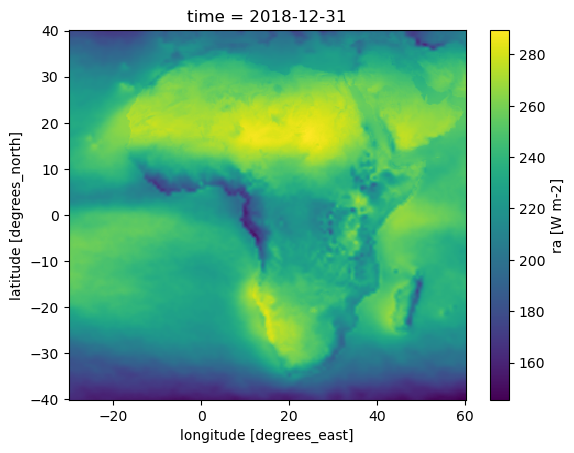

In [7]:
ds.ra[0].plot()

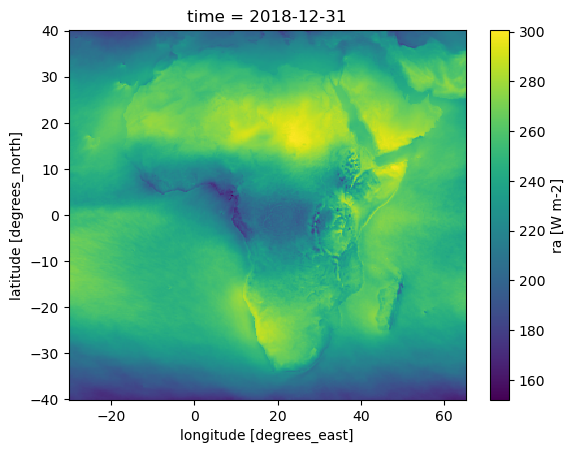

In [15]:
ds.ra[0].plot()